In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
print(tf.__version__)


2.10.0


In [2]:
observations=1000
xs = np.random.uniform(low=-10,high=10, size=(observations,1))
xz = np.random.uniform(low=-10,high=10, size=(observations,1))
inputs=np.column_stack((xs,xz))
print(inputs.shape)

(1000, 2)


In [3]:
noise = np.random.uniform(low=-1,high=1, size=(observations,1))
targets = 2*xs - 3*xz + 5 + noise
np.savez('TF_dataset', inputs=inputs, targets=targets)
print(targets.shape)

(1000, 1)


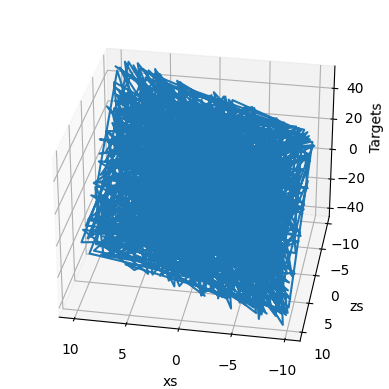

In [4]:
targets = targets.reshape(observations,)
xs = xs.reshape(observations,)
xz = xz.reshape(observations,)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(xs,xz,targets)
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')
ax.view_init(azim=100)
plt.show()

In [5]:
init_range = 0.1
weights = np.random.uniform(low=-init_range,high=init_range, size=(2,1))
biases = np.random.uniform(low=-init_range,high=init_range, size=1)
print(weights,biases)

[[ 0.00048365]
 [-0.00392983]] [-0.05026247]


In [6]:
targets = targets.reshape(observations,1) #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! przeksztalcic z powrotem
eta = 0.02
for i in range (100):
    outputs = np.dot(inputs, weights) + biases
    deltas = outputs - targets
    
    loss = np.sum(deltas ** 2)/2/observations
    print(loss)
    
    deltas_scaled = deltas/observations
    weights = weights - eta * np.dot(inputs.T, deltas_scaled)
    biases = biases - eta * np.sum(deltas_scaled) 
    

219.168572049869
36.48399790060753
14.863511158214383
11.899773722615938
11.152217817208575
10.685511922547068
10.267644972498067
9.869936632378144
9.488320919676678
9.12176173645449
8.769617241710057
8.431314634650949
8.106309082674597
7.794077849065914
7.494118828528155
7.205949661655839
6.92910694946666
6.663145506988967
6.40763764721446
6.162172493324268
5.9263553179640835
5.699806908491139
5.482162957170242
5.273073475338195
5.072202230594368
4.87922620611244
4.6938350812038365
4.515730732297547
4.344626753533887
4.180247996201244
4.022330126275226
3.8706191993486727
3.724871252268982
3.584851910826105
3.4503360128603062
3.3211072461836157
3.196957800732755
3.077688034394138
2.9631061519635913
2.853027896724514
2.7472762541485185
2.6456811672421
2.5480792630815556
2.454313590096414
2.3642333656789196
2.277693733713694
2.1945555316376524
2.1146850666556136
2.0379539007517384
1.9642386441510393
1.8934207568988877
1.8253863582393954
1.7600260434861759
1.6972347080909613
1.63691137862

In [7]:
print (weights, biases)

[[ 1.99540694]
 [-2.99630312]] [4.30561444]


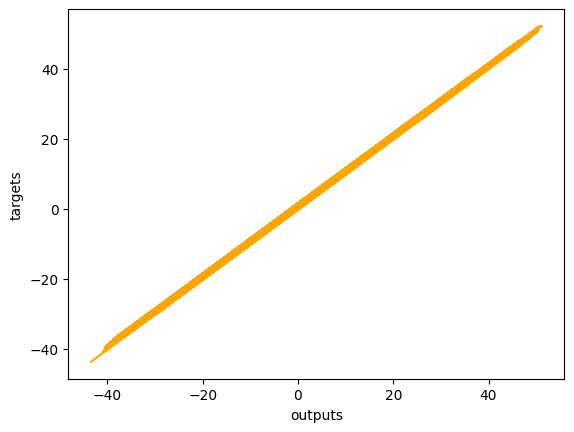

In [11]:
plt.plot(outputs, targets, color='orange')
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()